In [11]:
import tensorflow as tf
from model import HSwish, Block
# ------------------------------
# Load the H5 model
# ------------------------------
model = tf.keras.models.load_model('/Users/francesco/repos/computer_vision_project/models_dev/src/mole_bin_classifier/model_saved/skc_model.h5',
                                   custom_objects={"HSwish": HSwish, 
                                                   "HSwish act_func>HSwish": HSwish,
                                                   "Block>Block": Block}
                                   )
model.summary()  # Optional: prints the model architecture

# ------------------------------
# Create a ConcreteFunction from the Keras model
# ------------------------------
# This is needed for converting the model to TFLite.
input_shape = model.inputs[0].shape  # Example: [None, 224, 224, 3]
concrete_func = tf.function(lambda x: model(x)).get_concrete_function(
    tf.TensorSpec(input_shape, tf.float32)
)

# ------------------------------
# Convert to TFLite model (using float32)
# ------------------------------
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

# Since we want to maintain float32 precision, we do NOT set float16 quantization.
# You can still enable optimizations if desired, but avoid settings that force a change in data type.
# For pure float32, do not specify converter.target_spec.supported_types.
# Optionally, you can set:
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# However, note that some optimizations might try to quantize parts of the model.
# To be sure the model remains in float32, we simply leave out the target_spec.supported_types setting.

# If your model uses custom ops, allow fallback to TensorFlow ops:
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # TFLite built-in ops.
    tf.lite.OpsSet.SELECT_TF_OPS       # Fallback to TensorFlow ops for unsupported ones.
]

tflite_model = converter.convert()

# ------------------------------
# Save the TFLite model to disk
# ------------------------------
tflite_model_path = '/Users/francesco/repos/computer_vision_project/models_dev/src/mole_bin_classifier/model_saved/tflite_test/skc_model_test1_float32.tflite'  # Desired output path for the float32 model
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Float32 TFLite model successfully saved to {tflite_model_path}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 112, 112, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h_swish (HSwish)                │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block (Block)                   │ (None, 56, 56, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_1 (Block)                 │ (None, 28, 28, 24)     │         3,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_2 (Block)                 │ (None, 28, 28, 24)     │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_3 (Block)                 │ (None, 14, 14, 40)     │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_4 (Block)                 │ (None, 14, 14, 40)     │        56,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_5 (Block)                 │ (None, 14, 14, 40)     │        56,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_6 (Block)                 │ (None, 14, 14, 48)     │        21,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_7 (Block)                 │ (None, 14, 14, 48)     │        29,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_8 (Block)                 │ (None, 7, 7, 96)       │        92,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_9 (Block)                 │ (None, 7, 7, 96)       │       295,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_10 (Block)                │ (None, 7, 7, 96)       │       295,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 96)       │        82,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h_swish_17 (HSwish)             │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 576)      │        55,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1280)           │       738,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,752,011 (6.68 MB)

 Trainable params: 1,740,857 (6.64 MB)

 Non-trainable params: 11,152 (43.56 KB)

 Optimizer params: 2 (12.00 B)

I0000 00:00:1738617801.396762 3788252 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1738617801.396855 3788252 single_machine.cc:361] Starting new session


Float32 TFLite model successfully saved to /Users/francesco/repos/computer_vision_project/models_dev/src/mole_bin_classifier/model_saved/tflite_test/skc_model_test1_float32.tflite


W0000 00:00:1738617801.917460 3788252 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1738617801.917481 3788252 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


Loading /Users/francesco/repos/computer_vision_project/app_dev/assets/yolo11n_float32.tflite for TensorFlow Lite inference...


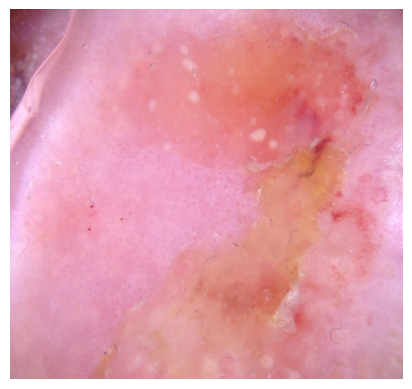

Mole detected with confidence 0.7858185768127441
Bounding Box: x1=326, y1=2, x2=2304, y2=1866
Image shape = (1864, 1978, 3)
Original Image shape = (1936, 2592, 3)
Input tensor shape: [  1 224 224   3]
Model output: [[    0.07128]]
Probability that the mole is malignant: 0.07
Input details: [{'name': 'x', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'Identity', 'index': 208, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {

In [19]:
import cv2
import matplotlib.pyplot
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow import keras
from model import HSwish, Block


yolo_model_path = '/Users/francesco/repos/computer_vision_project/app_dev/assets/yolo11n_float32.tflite'
img_path = '/Users/francesco/repos/computer_vision_project/models_dev/dataset/ISIC2020/train/train_images/ISIC_0235728.jpg'
conf_threshold = 0.5

model = YOLO(yolo_model_path, task='detect')
results = model.predict(
                source=str(img_path),
                imgsz=608,
                conf=conf_threshold,
                save=False,
                device='cpu',
                verbose=False
            )
original_img = cv2.imread(str(img_path))
original_img= cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img_height, img_width = original_img.shape[:2]

for result in results:
    boxes = result.boxes
    if len(boxes) > 0:
        confidences = [box.conf.item() for box in boxes]
        best_idx = np.argmax(confidences)
        box = boxes[best_idx]
        
        if box.conf.item() > conf_threshold:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

            class_id = box.cls.item()

            cropped_img = original_img[y1:y2, x1:x2]
            plt.imshow(cropped_img)
            plt.axis('off')
            plt.show()
            print(f"Mole detected with confidence {box.conf.item()}")
            print(f"Bounding Box: x1={x1}, y1={y1}, x2={x2}, y2={y2}")
            print(f"Image shape = {cropped_img.shape}")
            print(f"Original Image shape = {original_img.shape}")
        else:
            print(f"Image {img_path} has confidence {box.conf.item()} which is below the threshold {self.conf_threshold}")
    else:
        print(f"No detections found for {img_path}")


# ------ PREPROCESS --------
img_tensor = tf.convert_to_tensor(cropped_img, dtype=tf.float32)
img = img_tensor / 255.0
img = tf.image.resize(img, [224, 224])
img = tf.expand_dims(img, axis=0)


# # =========================== TFLITE IMPLEMENTATION =====================
#Load TFLite model
interpreter = tf.lite.Interpreter(model_path='/Users/francesco/repos/computer_vision_project/models_dev/src/mole_bin_classifier/model_saved/tflite_test/skc_model_test1_float32.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# # Load and preprocess the image
# image = cropped_img.resize((224, 224))
# input_data = np.asarray(image).astype('float32') / 255.0  # Normalize to [0, 1]
# input_data = np.expand_dims(input_data, axis=0)  # Add batch dimension (shape: [1, 224, 224, 3])

# Check input tensor shape
print("Input tensor shape:", input_details[0]['shape'])  # Should print [1, 224, 224, 3]

# Run inference
interpreter.set_tensor(input_details[0]['index'], img)  # Pass 4D tensor (not flattened)
interpreter.invoke()

# Get output
output = interpreter.get_tensor(output_details[0]['index'])
print("Model output:", output)  # Prints the risk score or prediction
# Model outputs logits, apply sigmoid
probabilities = tf.sigmoid(output)
malignant_prob = output[0][0]
print(f"Probability that the mole is malignant: {malignant_prob:.2f}")



print("Input details:", interpreter.get_input_details())
print("Output details:", interpreter.get_output_details())


## ============================ KERAS IMPLEMENTATION ==============================

# model = tf.keras.models.load_model('/Users/francesco/repos/computer_vision_project/models_dev/src/mole_bin_classifier/model_saved/skc_model.h5',
#                                    custom_objects={"HSwish": HSwish, 
#                                                    "HSwish act_func>HSwish": HSwish,
#                                                    "Block>Block": Block}
#                                    )
# prediction = model.predict(img)
# print(f"prediction: {prediction}")
# malignant_prob = prediction[0][0]
# print(f"Probability that the mole is malignant: {malignant_prob:.2f}")




# Pipeline with tflite implementation

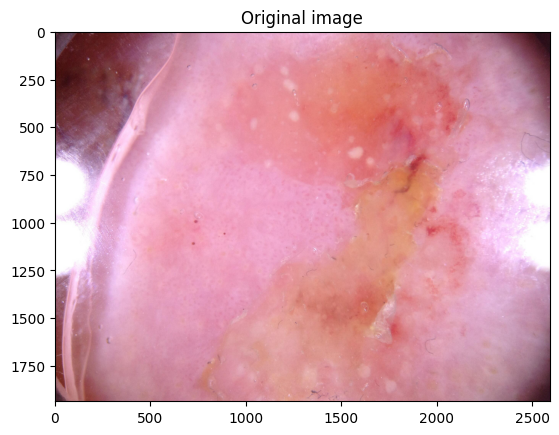

(1936, 2592, 3)


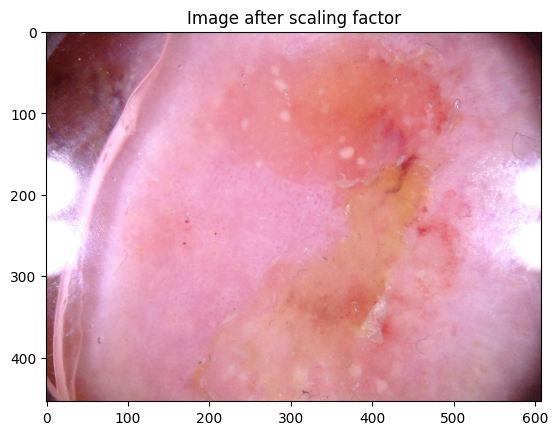

(454, 608, 3)


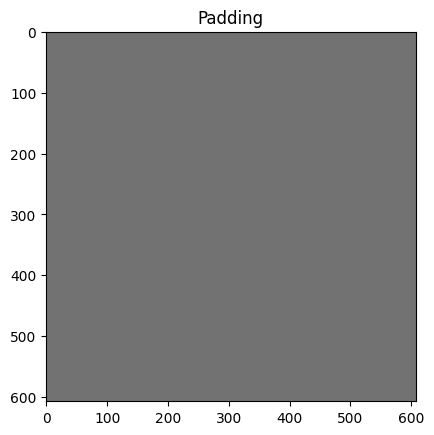

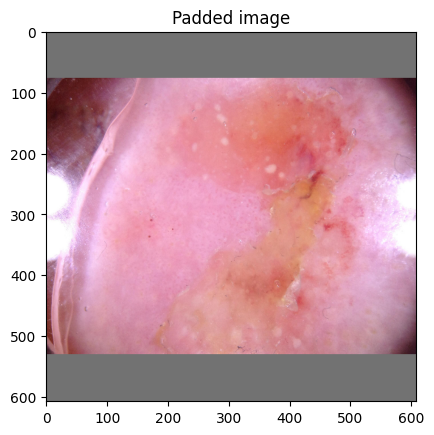

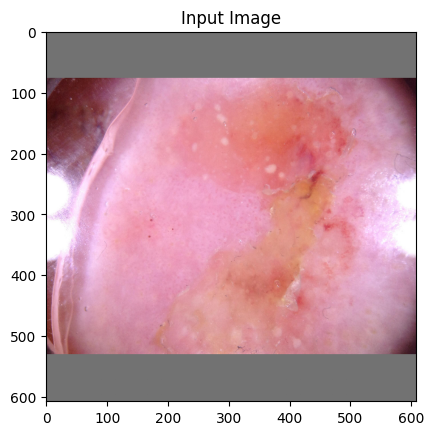

All scores: [   4.14e-08  3.9577e-08  2.2263e-08 ...  7.2724e-07  1.2316e-07  7.7245e-08]
Filtered scores: [    0.74233     0.78299      0.7857     0.74239     0.78582     0.78536     0.78163     0.69992     0.73117     0.72864]

Normalized coordinates:
x: [    0.51788     0.51039     0.50844     0.51775     0.50743     0.50575     0.51129     0.51676     0.50589     0.50278]
y: [    0.47418      0.4753     0.47561     0.48465     0.48714     0.48872     0.48921     0.49431     0.49517     0.49419]
w: [    0.77942      0.7591     0.76111     0.78416     0.76308     0.76753     0.75773     0.78552     0.77092     0.77653]
h: [    0.69275     0.69351     0.69273     0.71558     0.71934     0.71971      0.7211     0.72936     0.73142      0.7281]

Unclipped coordinates:
x1: [     77.928      79.553      77.756       76.41      76.541      74.164      80.515      75.394      73.219      69.624]
y1: [    0.70419      1.1558      1.5788     0.13266     0.50424      1.3504      1.2259      1.

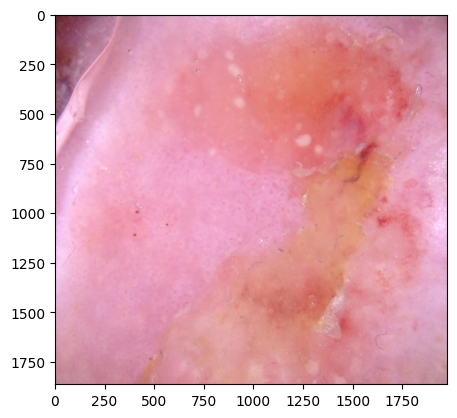

In [ ]:
import matplotlib.pyplot as plt
def process_image(img_path, yolo_model_path, classifier_model_path, conf_threshold=0.5, img_size=608):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if image is None:
        print(f"Error: Could not load image at {img_path}")
        return None
    
    plt.imshow(image)
    plt.title('Original image')
    plt.show()
    print(image.shape)

    # Prepare image for YOLO detection    
    original_height, original_width = image.shape[:2]

    # Calculate scale ratio
    r = float(img_size) / max(original_height, original_width)
    if r != 1:
        new_size = (int(original_width * r), int(original_height * r))
        image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
        plt.imshow(image)
        plt.title('Image after scaling factor')
        plt.show()
        print(image.shape)


    # Create padded image (using value 114 as seen in YOLO)
    new_image = np.full((img_size, img_size, 3), 114, dtype=np.uint8)

    plt.imshow(new_image)
    plt.title('Padding')
    plt.show()

    # Calculate padding
    new_height, new_width = image.shape[:2]
    dw = (img_size - new_width) / 2
    dh = (img_size - new_height) / 2

    # Place the resized image in the center
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    new_image[top:top + new_height, left:left + new_width] = image

    plt.imshow(new_image)
    plt.title('Padded image')
    plt.show()

    # Convert to RGB and normalize
    #input_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    input_image = new_image.astype(np.float32) / 255.0

    plt.imshow(input_image)
    plt.title('Input Image')
    plt.show()
    
    # Load YOLO model
    yolo_interpreter = tf.lite.Interpreter(model_path=yolo_model_path)
    yolo_interpreter.allocate_tensors()
    
    # Get model details
    yolo_input_details = yolo_interpreter.get_input_details()
    yolo_output_details = yolo_interpreter.get_output_details()
    
    # Run YOLO inference
    yolo_interpreter.set_tensor(yolo_input_details[0]['index'], np.expand_dims(input_image, 0))
    yolo_interpreter.invoke()
    
    # Get output
    detections = yolo_interpreter.get_tensor(yolo_output_details[0]['index'])
    
    # ======== BOX EXTRACTION ============
    predictions = np.transpose(detections[0])
    scores = predictions[:, 4]
    print(f"All scores: {scores}")
    
    mask = scores > conf_threshold
    predictions = predictions[mask]
    scores = scores[mask]
    print(f"Filtered scores: {scores}")

    if len(predictions) > 0:
        # Extract normalized coordinates (relative to padded image)
        x = predictions[:, 0]  # center x
        y = predictions[:, 1]  # center y
        w = predictions[:, 2]  # width
        h = predictions[:, 3]  # height
        
        print(f"\nNormalized coordinates:")
        print(f"x: {x}")
        print(f"y: {y}")
        print(f"w: {w}")
        print(f"h: {h}")

    # Convert normalized coordinates to actual coordinates in padded image
    x = x * img_size
    y = y * img_size
    w = w * img_size
    h = h * img_size
    
    # Remove padding
    x = x - dw
    y = y - dh

    # Convert to corner format in resized image space
    x1 = x - w/2
    y1 = y - h/2
    x2 = x + w/2
    y2 = y + h/2
    
    print(f"\nUnclipped coordinates:")
    print(f"x1: {x1}")
    print(f"y1: {y1}")
    print(f"x2: {x2}")
    print(f"y2: {y2}")

    # Clip to resized image bounds
    x1 = np.clip(x1, 0, new_width - 1)
    x2 = np.clip(x2, 0, new_width - 1)
    y1 = np.clip(y1, 0, new_height - 1)
    y2 = np.clip(y2, 0, new_height - 1)
    
    print(f"\nClipped coordinates:")
    print(f"x1: {x1}")
    print(f"y1: {y1}")
    print(f"x2: {x2}")
    print(f"y2: {y2}")

    # Stack boxes
    boxes = np.stack([y1, x1, y2, x2], axis=-1).astype(np.float32)
    scores = scores.astype(np.float32)

    # ============= NMS ============
    if len(boxes) > 0:
        # Apply NMS
        selected_indices = tf.image.non_max_suppression(
            boxes=boxes,
            scores=scores,
            max_output_size=100,
            iou_threshold=0.5,
            score_threshold=float('-inf')
        ).numpy()

    if len(selected_indices) > 0:
        # Get best detection
        best_idx = np.argmax(scores[selected_indices])
        best_box = boxes[selected_indices[best_idx]]
        best_score = scores[selected_indices[best_idx]]
        
        # Get integer coordinates
        ymin, xmin, ymax, xmax = map(int, best_box)
        print(f"\nFinal box coordinates:")
        print(f"xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")
        
        # Scale coordinates back to original image
        scale = r
        xmin = int(xmin / scale)
        ymin = int(ymin / scale)
        xmax = int(xmax / scale)
        ymax = int(ymax / scale)
        
        # Ensure valid coordinates
        xmin = max(0, xmin)
        ymin = max(0, ymin)
        xmax = min(original_img.shape[1] - 1, xmax)
        ymax = min(original_img.shape[0] - 1, ymax)
        
        print(f"Scaled coordinates for original image:")
        print(f"xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")
        print(f"Original image shape: {original_img.shape}")
        
        # Verify box dimensions
        if xmax <= xmin or ymax <= ymin:
            print("Invalid box dimensions!")
            return None
        
        # Crop from original image (still in BGR)
        cropped_img = original_img[ymin:ymax, xmin:xmax]
        print(f"Cropped image shape: {cropped_img.shape}")
        
        # Verify cropped image
        if cropped_img.size == 0:
            print("Empty cropped image!")
            return
        #cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

    plt.imshow(cropped_img)

    print(f"Mole detected with confidence {scores[best_idx]:.2f}")
    print(f"Bounding Box: x1={x1}, y1={y1}, x2={x2}, y2={y2}")
    print(f"Cropped Image shape = {cropped_img.shape}")
    print(f"Original Image shape = {original_img.shape}")
    
## ======================== IMAGE CLASSIFICATION =============================
    try:

                            # ------ PREPROCESS --------
        img_tensor = tf.convert_to_tensor(cropped_img, dtype=tf.float32)
        img = img_tensor / 255.0
        img = tf.image.resize(img, [224, 224])
        img = tf.expand_dims(img, axis=0)


        # # =========================== TFLITE IMPLEMENTATION =====================
        #Load TFLite model
        interpreter = tf.lite.Interpreter(model_path='/Users/francesco/repos/computer_vision_project/models_dev/src/mole_bin_classifier/model_saved/tflite_test/skc_model_test1_float32.tflite')
        interpreter.allocate_tensors()

        # Get input and output details
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Check input tensor shape
        print("Input tensor shape:", input_details[0]['shape'])  # Should print [1, 224, 224, 3]

        # Run inference
        interpreter.set_tensor(input_details[0]['index'], img)  # Pass 4D tensor (not flattened)
        interpreter.invoke()

        # Get output
        output = interpreter.get_tensor(output_details[0]['index'])
        print("Model output:", output)  # Prints the risk score or prediction
        malignant_prob = output[0][0]
        print(f"Probability that the mole is malignant: {malignant_prob:.2f}")



        print("Input details:", interpreter.get_input_details())
        print("Output details:", interpreter.get_output_details())

        return {
            'cropped_image': cropped_img,
            'malignant_probability': malignant_prob,
            'raw_output': output,
            'detection_confidence': scores[best_idx],
            'bbox': [x1, y1, x2, y2]
        }
        
    except Exception as e:
        print(f"Error during classification: {str(e)}")
        return None

# Usage remains the same
def main():
    yolo_model_path = '/Users/francesco/repos/computer_vision_project/app_dev/assets/yolo11n_float32.tflite'
    classifier_model_path = '/Users/francesco/repos/computer_vision_project/app_dev/assets/skc_model.tflite'
    img_path = '/Users/francesco/repos/computer_vision_project/models_dev/dataset/ISIC2020/train/train_images/ISIC_0235728.jpg'
    
    results = process_image(
        img_path=img_path,
        yolo_model_path=yolo_model_path,
        classifier_model_path=classifier_model_path,
        conf_threshold=0.5
    )
    
    if results:
        print("\nFinal Results:")
        print(f"Detection Confidence: {results['detection_confidence']:.2%}")
        print(f"Malignancy Probability: {results['malignant_probability']:.2%}")
        print(f"Bounding Box: {results['bbox']}")

if __name__ == "__main__":
    main()